# Methods I: Programming and Data Analysis

## Session 11: Regular Expressions; NLTK; Classes

### Gerhard Jäger

#### (based on Johannes Dellert's slides)

January 18, 2022

### Pattern Detection in Strings

In many applications, we need to **find strings matching a pattern**:

-   find all documents containing a given name

-   find example sentences for the usage of some word in a corpus

-   find the places in your code where you used some variable

Also, we often need to **extract parts of a string** matching a pattern:

-   extract addresses from a text

-   extract everything that is formatted like a name\
    (e.g. a sequence of several tokens starting with uppercase letters)

-   extract the words which can occur as arguments to a specific verb
    from a corpus (e.g. to determine selectional restrictions)

### Regular Expressions: Basics

What are **regular expressions** (short: **regex**)?

-   a language of patterns which define sets of strings

-   **literal characters** (mostly letters of the alphabet) represent
    themselves in a pattern\
    `r"b"` represents `{"b"}`\
    `r"ba"` represents `{"ba"}`

-   **special characters** (mostly punctuation) do not represent
    themselves, but modify the meaning of surrounding patterns:

-   first examples of special characters:

    -   plus `+` designates one or more instances of the previous
        character:\
        `r"ba+"` represents `{"ba", "baa", "baaa", ...}`

    -   square brackets `[]` represent character sets:\
        `r"ba[tr]"` represents `{"bat", "bar"}`

    -   both can be combined: `r"ba[tr]+"` represents\
        `{"bat", "bar", "batt", "batr", "bart", "barr", "battt", "battr", "batrt", "batrr", "bartt", "bartr", "barrt", "barrr", "batttt", "batttr", "battrt", "battrr", ...}`


### Regular Expressions: Quantifiers

**Quantifiers** range over the preceding item and decide how many times
it can or must be repeated to be matched:

-   `*` for zero or more repetitions

-   `+` for at least one repetition

-   `?` for optional items (zero repetitions or one repetition)

More general quantification can be achieved by `{min, max}`, where `min`
and `max` must be positive integers:

-   `r"a{4,6}"` matches the strings `"aaaa"`, `"aaaaa"`, and `"aaaaaa"`

-   `r"[01]{8}"` matches bitstrings of length 8 (byte representations)

-   `r"0{2,}"` matches sequences of at least 2 zeroes

### Regular Expressions: The Wildcard

The **wildcard symbol** `.` (the dot) matches any character except the
new-line character, e.g.

-   `r"h.t"` matches `hat`, `hot`, and `hit`, but not `heat`

-   `r".a.a.a"` matches `banana` and `papaya`, but not `kaaba`

-   `r"9.00"` matches `9a00`, `9100`, `9y00`, and `9c00`, not only
    `9.00`\
    (you need to **escape** the dot for that: `r"9\.00"`)

-   `r".{3}"` matches any three-character word

Special symbols match the beginning and the end of the line:

-   `r"^"` matches the beginning of the line

-   `r"$"` matches the end of the line
-   `r"^a.*"` matches any string starting with `"a"`occurring at the beginning of a line

### Regular Expressions: Character Sets and Ranges

Brackets `[ ]` define **character sets** matching a single character,
and can be **negated** using a caret (`^`) after the opening bracket:

-   `[aeiou]` matches one (Latin) vowel

-   `[^aeiou]` matches everything except Latin vowels

Some character sets can conveniently be defined using **character
ranges**:

-   `[A-Z]` is the same as `[ABCDEFGHIJKLMNOPQRSTUVWXYZ]`

-   `[0-9]` is the same as `[0123456789]`

Several escaped characters serve as convenient shorthands:

-   `\d` for digits (= `[0-9]`)

-   `\w` for word characters (= `[a-zA-Z0-9_]`)

-   `\s` for whitespace (= `[ \t\r\n]`)

### Regular Expressions: Alternation

The **alternation metacharacter** `|` matches either the previous or the
next expression:

-   `r"apple|orange"` matches `"apple"` and `"orange"`

-   Q: what does `r"apple(juice|sauce)"` match?

-   Q: what does `r"w(ei|ie)rd"` match?

Multiple alternatives can be used as well:

-   `r"apple|orange|banana"`

-   `r"(AA|BB|CC){6}"` matches e.g. `"AABBAACCAABB"`

### Regular Expressions: Grouping

The **grouping metacharacters** `( )` serve to

-   apply repetition operators to a sequence of literal characters

-   make expressions easier to read

-   define groups for use in matching and replacing

Examples:

-   `r"(abc)+"` matches e.g. `"abc"` and `"abcababc"`

-   `r"(in)?dependent"` matches `"independent"` and `"dependent"`

### Regular Expressions: Referencing Groups

-   a group can be *referenced* later in the same string
-   `r"\\1"` matches *exactly the same string* that matched the first preceding group
-   `r"\\2"` matches the second preceding group etc.
-   `r"A (rose|tulip) is a \\1 is a \\1"`:
    - "A rose is a rose is a rose" ✔
    - "A tulip is a tulip is a tulip" ✔
    - "A rose is a rose is a tulip" ❌
    - "A tulip is a rose is a rose" ❌
-   `r"(.).*\\1"` matches any string where the first and the last character are identical and non-overlapping:
    -   "aa" ✔
    -   "axyzdefa" ✔
    -   "axyzdefb" ❌
    -   "a" ❌

### Regular Expressions: The `re` module

Basic usage of the built-in `re` module:

- import the module to make the namespace available:

In [1]:
import re

- compile your regular expression string into a **regular expression
object** which can be used to very efficiently match against the
regex

In [2]:
matcher = re.compile("(.)([aeiou]{2}n)")

- use the `match()` method to test the entire string:

In [3]:
matcher.match("moon")

<re.Match object; span=(0, 4), match='moon'>

In [4]:
print(matcher.match("I have been to the moon."))

None


### Regular Expressions: The `re` module

-   `search()` looks for matching substrings instead:

In [5]:
matcher.search("I have been to the moon.")

<re.Match object; span=(7, 11), match='been'>

In [6]:
"I have been to the moon."[7:11]

'been'

- using a match result object:

In [7]:
match = matcher.search("I have been to the moon.")

In [8]:
match

<re.Match object; span=(7, 11), match='been'>

In [9]:
match.start(), match.end(), match.groups()

(7, 11, ('b', 'een'))

In [10]:
matcher.search("I have been to the moon.", 8).groups()

('m', 'oon')

`findall()` lists all groupings in matched substrings:

In [11]:
matcher.findall("I have been to the moon.")

[('b', 'een'), ('m', 'oon')]

### Regular Expressions: The `re` module

-   `sub(repl, string)` replaces each each matching substring in
    `string` with `repl`

-   `repl` can contain references to groups

In [12]:
matcher = re.compile("[0-9]")

In [13]:
matcher.sub("?", "UFKc17X")

'UFKc??X'

In [14]:
matcher = re.compile("(.+)")
matcher.sub("A \\1 is a \\1 is a \\1", "rose")

'A rose is a rose is a rose'

In [15]:
matcher = re.compile("(.+)")
matcher.sub("A \\1 is a \\1 is a \\1", "tulip")

'A tulip is a tulip is a tulip'

Natural Language Toolkit (NLTK)
===============================

### NLTK

-   example of a good Python package

-   includes implementations of many common algorithms

-   sample of the entire Natural Language Processing (NLP) toolchain

-   solves many common tasks in satisfactory quality (for English)

-   very interesting for linguists interested in computing

-   good documentation (an entire book)

### NLTK: Installation

Installing NLTK and the relevant data:

-   in a terminal, execute the following command:

  ``` {style="console"}
     $ conda install nltk
  ```

- after installation, fire up a Python console (e.g. inside Spyder)

- run the following:

In [17]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

-   in the window that appears, double-click on `book` and `popular` to
    download and install the relevant packages and data

-   wait until everything is installed, and close the window

### NLTK: First Steps

First steps in getting to know NLTK:

-   go to <https://www.nltk.org/>

-   run the examples listed under\
    "Some simple things you can do with NLTK":

    -   tokenizing and tagging

    -   named entity recognition

    -   exploring a treebank

- Tokenize and tag some text

In [18]:
sentence = """At eight o'clock on Thursday morning Arthur didn't feel very good."""


In [19]:
tokens = nltk.word_tokenize(sentence)
tokens

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

In [20]:
tagged = nltk.pos_tag(tokens)
tagged


[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN'),
 ('Arthur', 'NNP'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('feel', 'VB'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('.', '.')]

- Identify named entitites:

In [21]:
import numpy
entities = nltk.chunk.ne_chunk(tagged)
print(entities)


(S
  At/IN
  eight/CD
  o'clock/NN
  on/IN
  Thursday/NNP
  morning/NN
  (PERSON Arthur/NNP)
  did/VBD
  n't/RB
  feel/VB
  very/RB
  good/JJ
  ./.)


- Display a parse tree:

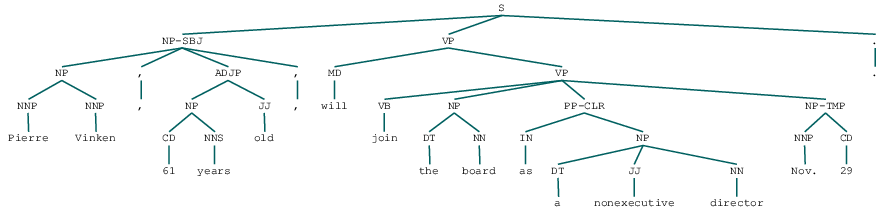

In [22]:
from nltk.corpus import treebank
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t

### NLTK: Documentation

How to find out more:

-   open the book at <http://www.nltk.org/book/>

-   start reading the chapter you want to learn about

-   make sure to try out the examples\
    (interactivity helps you to understand things better)

-   take a look at the exercises and try your hand at the ones which
    involve skills you might need

-   BTW: the book also doubles as an introduction to Python, consider
    working through the examples and exercises if you want to brush up
    on programming later on!
